<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [99]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [100]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [101]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
disgust    1066
Name: emosi, dtype: int64

In [102]:
df1 = pd.read_csv(url0)

In [103]:
df1=df1.drop(df1[df1['emosi'] == 'joy'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'sadness'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'anger'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'fear'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'disgust'].sample(frac=1).index)

In [8]:
df1.emosi.value_counts()

shame    1071
guilt    1050
Name: emosi, dtype: int64

In [54]:
df2=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus2.txt', delimiter = ";")
df2.columns=['dok','tes']

In [55]:
df3=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus3.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
# df3.columns = ["arti"]

persiapan corpus tambahan

In [104]:
final=[]

In [105]:
final.extend(df1.dokumen)

In [58]:
final.extend(df2.dok)

In [59]:
dfg = pd.DataFrame(final)
dfg.columns=["dok"]

preputama : lower case

In [60]:
def lower(temp):
  return temp.str.lower()

In [106]:
df['dokumen']=lower(df['dokumen'])

In [62]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [63]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [64]:
df=bersih_noise(df)

In [65]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [67]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [68]:
df.dokumen=expand_word(df.dokumen)

In [69]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [70]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [71]:
df['dokumen'] = clns_punc(df['dokumen'])

In [72]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [73]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [74]:
df.dokumen=clns_numb(df.dokumen)

In [75]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [76]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [77]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [78]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [79]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [107]:
df.dokumen=token(df.dokumen)

In [81]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [83]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [84]:
lemma(df['dokumen'])

In [85]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [86]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

word2ec

In [87]:
from gensim.models import Word2Vec

In [108]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

cek model

In [89]:
w2v.wv.vectors.shape

(20277, 100)

In [90]:
w2v.wv["moment"]

array([ 0.12867427,  0.01396201,  0.01432298, -0.32870272, -0.17106979,
        0.01627971,  0.34612995,  0.12494966,  0.0356646 , -0.12782395,
        0.13928081,  0.13240905, -0.07025223, -0.07753775, -0.15582228,
       -0.08078723,  0.07190374,  0.40107775, -0.00895387, -0.20060022,
        0.0984357 , -0.13035437, -0.10303079,  0.1140699 ,  0.14040287,
        0.22521396, -0.31365946,  0.35828522,  0.0273714 , -0.22181247,
       -0.36703914,  0.01398883,  0.09007971, -0.05221056, -0.28456688,
        0.05537104,  0.0393889 , -0.05825359, -0.18170862, -0.36297542,
        0.17426002, -0.14353864,  0.09834726,  0.01072918,  0.12362657,
       -0.09041401,  0.20942108, -0.03129197, -0.18391465,  0.04475451,
        0.07904385,  0.09538324,  0.32528087, -0.3420382 ,  0.10028277,
       -0.43569213,  0.06053071, -0.35447505,  0.01213595,  0.23388828,
       -0.04178898,  0.09657025,  0.0048168 ,  0.38916576,  0.07542612,
       -0.09407083, -0.13882567,  0.11582655, -0.27038068, -0.12

ekstraksi fitur

In [109]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,w2v.wv[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

KeyError: ignored

In [ ]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

klasifikasi svm

In [93]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [95]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

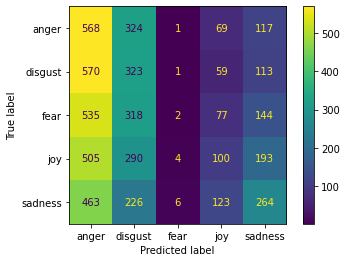

0.2329935125115848
(0.22547149274826078, 0.23336833115645822, 0.19405260253826212, None)


In [110]:
klasifikasi('poly')

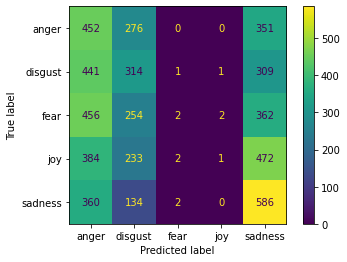

0.2511584800741427
(0.2585385706276634, 0.2515659260041818, 0.1873929872156951, None)


In [111]:
klasifikasi('rbf')

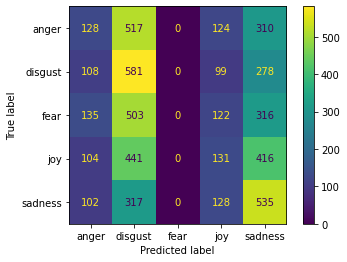

0.2548656163113994
(0.19468500205954892, 0.2556149171276467, 0.20253158153166284, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
klasifikasi('linear')